### QED-C Application-Oriented Benchmarks - Hamiltonian Simulation with HamLib - Observables

The notebook contains specific examples for the HamLib-based Hamiltonian Simulation benchmark program.
Configure and run the cell below with the desired execution settings.
Then configure and run the remaining cell(s), each one a variation of this benchmark.

This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian, and plots the expectation value and execution time over the number of qubits in the problem.


In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# Benchmark execution settings
min_qubits=4
max_qubits=16
skip_qubits=1
max_circuits=1
num_shots=10000

# number of Trotter steps and total evolution time
K = 1
t = 0.1

# initial state can be "checkerboard", "ghz", or "random"
init_state = "checkerboard"

# method to generate commuting groups
# Can be:  None, "simple", "1", "2", "N", "estimator"
group_method = "simple"   

backend_id="qasm_simulator"
#backend_id="statevector_simulator"

hub=""; group=""; project=""
provider_backend = None
exec_options = {}

# # ==========================
# # *** If using IBM Quantum hardware, run this once to authenticate
# from qiskit_ibm_runtime import QiskitRuntimeService
# QiskitRuntimeService.save_account('YOUR_API_TOKEN_HERE')

# # *** If you use `ibm_quantum` channel, set hub, group, and project name here
# hub="YOUR_HUB_NAME"; group="YOUR_GROUP_NAME"; project="YOUR_PROJECT_NAME"

# # *** If you use `ibm_cloud` channel, set hub, group, and project name here
# hub=""; group=""; project="Cloud Resrouce Name (CRN) or service name"

# *** This example shows how to specify an IBMQ backend using a known "backend_id"
#     See the App-Oriented Benchmarks setup page documentation for more info ob backends and options. 
# exec_options = {
#     "use_ibm_quantum_platform": False,
#     "use_sessions": True,
# }
# backend_id="ibm_fez"

# which API to use, "qiskit" or "cudaq"
api = "qiskit"

# options in develoopment
# execute by distributing shots weighted by term coefficients
distribute_shots = False


In [3]:
# Configure benchmark library modules
import sys
sys.path.insert(1, "../_common")
sys.path.insert(1, "../_common/qiskit")

import execute
execute.verbose = False
execute.verbose_time = False

# Configure paths for hamlib benchmark modules
sys.path.insert(1, "_common")
sys.path.insert(1, "qiskit")

# ... access to HamLib datasets
import hamlib_utils
hamlib_utils.verbose = False

# ... for api-specific kernel functions (circuits)
import hamlib_simulation_kernel
hamlib_simulation_kernel.verbose = False

# ... for high-level HamLib simulation benchmark loop
import hamlib_simulation_benchmark
hamlib_simulation_benchmark.verbose = False

# option to save each Hamiltonian dataset to json file
hamlib_simulation_benchmark.save_dataset_file = False

# set noise to None and uncomment the data_suffix to make an ideal simulator if using qasm_simulator
execute.noise = None
#hamlib_simulation_benchmark.data_suffix = ".noisy"


### Hamiltonian Simulation - Transverse Field Ising Model


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 19, 2025 20:41:33 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... number of terms in Hamiltonian = 8
... number of circuits executed = 2
... quantum execution time = 0.089
... exact computation time = 0.006 sec

    Exact expectation value, computed classically: -4.0
    Estimated expectation value, from quantum algorithm: -3.3528
    ==> Simulation Quality: 0.838

************
Executing [1] circuits with num_qubits = 5
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-5_h-2
... number of terms in Hamiltonian = 10
... number of circuits executed = 2
... quantum execution time = 0.06
... exact computation time = 0.022 sec

    Exact expectation value, computed classically: -3.0
    Estimated expectation value, from quantum algorithm: -2.6308
    ==> Simulation Quality: 0.877

************
Executing [1] circuits with num_qubits = 6
... 

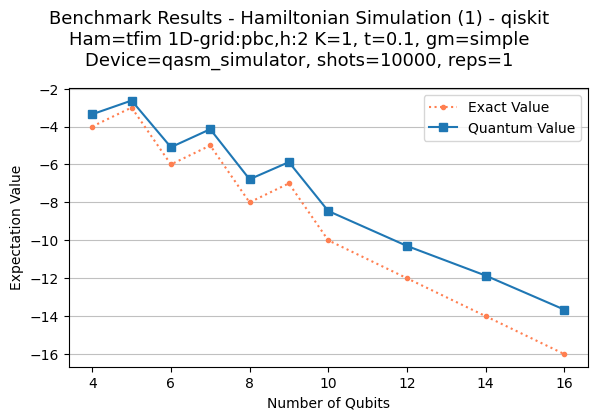

----- Expectation Time Plot -----


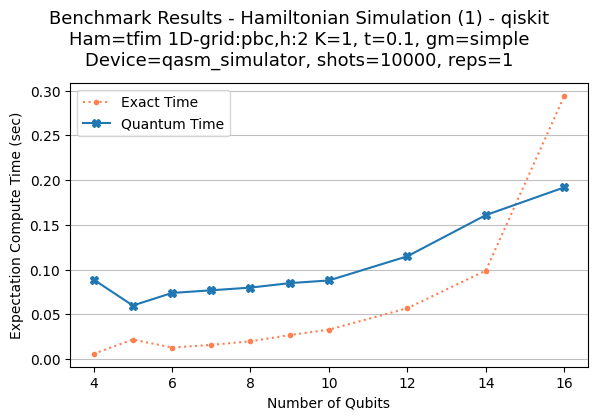

In [4]:
# Transverse Field Ising Model - 1D grid pbc h=2
hamiltonian_name = 'condensedmatter/tfim/tfim'
hamiltonian_params = { "1D-grid": "pbc", "h": 2 }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=1, hamiltonian = hamiltonian_name, K = K, t = t, init_state = init_state,
            hamiltonian_params = hamiltonian_params, group_method = group_method,
            do_observables = True, distribute_shots = distribute_shots,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Heisenberg Model


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 19, 2025 20:41:42 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-nonpbc-qubitnodes_Lx-4_h-1
... number of terms in Hamiltonian = 13
... number of circuits executed = 3
... quantum execution time = 0.078
... exact computation time = 0.016 sec

    Exact expectation value, computed classically: -3.0
    Estimated expectation value, from quantum algorithm: -3.0084
    ==> Simulation Quality: 1.003

************
Executing [1] circuits with num_qubits = 5
... dataset_name = graph-1D-grid-nonpbc-qubitnodes_Lx-5_h-1
... number of terms in Hamiltonian = 17
... number of circuits executed = 3
... quantum execution time = 0.094
... exact computation time = 0.016 sec

    Exact expectation value, computed classically: -3.0
    Estimated expectation value, from quantum algorithm: -4.9832
    ==> Simulation Quality: 1.661

************
Executing [1] circuits with num_qubits 

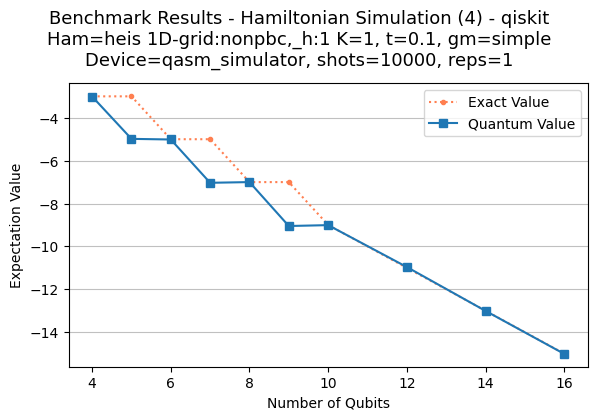

----- Expectation Time Plot -----


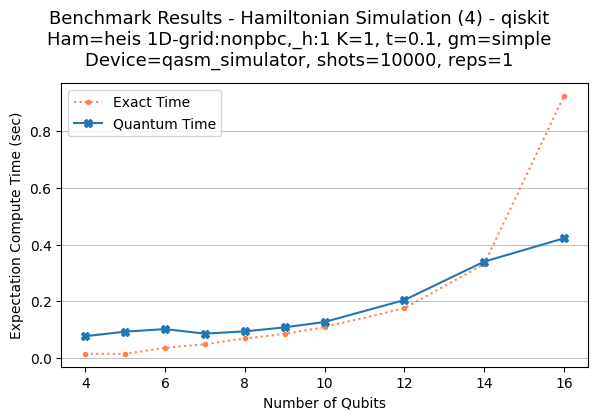

In [5]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/heisenberg/heis'
hamiltonian_params = { "1D-grid": "nonpbc", "_h": 1 }

hamlib_simulation_benchmark.run(
            min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params, group_method = group_method,
            do_observables = True, distribute_shots = distribute_shots,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Fermi-Hubbard Model


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 19, 2025 20:41:48 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = fh-graph-1D-grid-pbc-qubitnodes_Lx-2_U-12_enc-bk
... number of terms in Hamiltonian = 11
... number of circuits executed = 2
... quantum execution time = 0.057
... exact computation time = 0.013 sec

    Exact expectation value, computed classically: -0.0
    Estimated expectation value, from quantum algorithm: -0.002
    ==> Simulation Quality: 0.0

************
Executing [1] circuits with num_qubits = 6
... dataset_name = fh-graph-1D-grid-pbc-qubitnodes_Lx-3_U-12_enc-bk
... number of terms in Hamiltonian = 22
... number of circuits executed = 7
... quantum execution time = 0.201
... exact computation time = 0.038 sec

    Exact expectation value, computed classically: -0.0
    Estimated expectation value, from quantum algorithm: 0.0314
    ==> Simulation Quality: 0.0

************
Executing [1] circuits with n

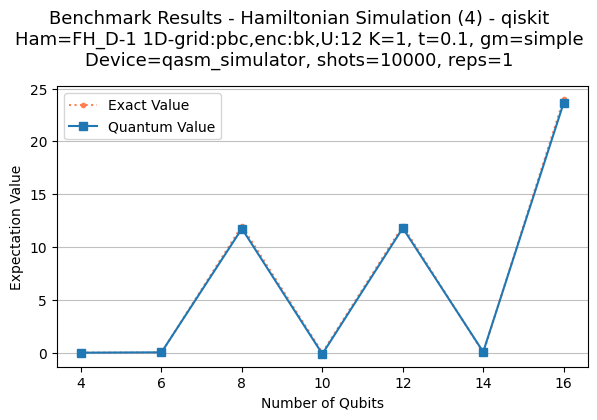

----- Expectation Time Plot -----


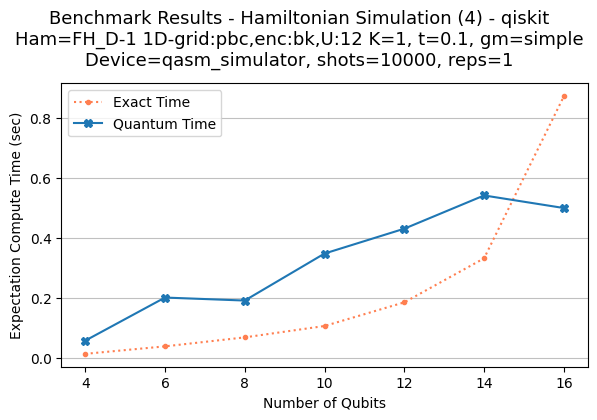

In [6]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/fermihubbard/FH_D-1'
hamiltonian_params = { "1D-grid": "pbc", "enc": "bk", "U":12 }

hamlib_simulation_benchmark.run(
            min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params, group_method = group_method,
            do_observables = True, distribute_shots = distribute_shots,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Bose-Hubbard Model


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 19, 2025 20:42:01 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-2_U-10_enc-gray_d-4
... number of terms in Hamiltonian = 39
... number of circuits executed = 9
... quantum execution time = 0.328
... exact computation time = 0.047 sec

    Exact expectation value, computed classically: 60.0
    Estimated expectation value, from quantum algorithm: 59.9755
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qubits = 6
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-3_U-10_enc-gray_d-4
... number of terms in Hamiltonian = 74
... number of circuits executed = 11
... quantum execution time = 0.497
... exact computation time = 0.112 sec

    Exact expectation value, computed classically: 90.0
    Estimated expectation value, from quantum algorithm: 90.0068
    ==> Simulation Quality: 1.0

************
Executin

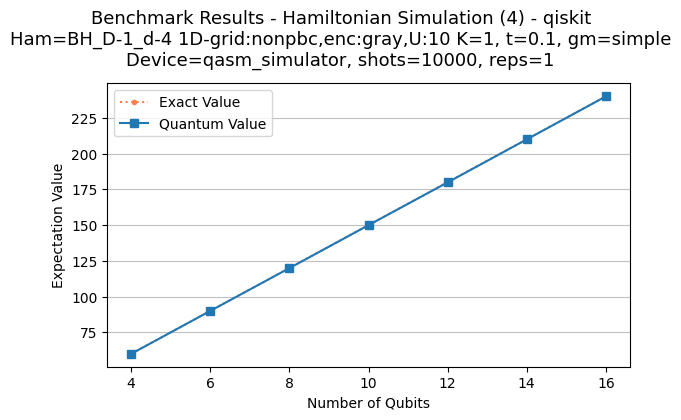

----- Expectation Time Plot -----


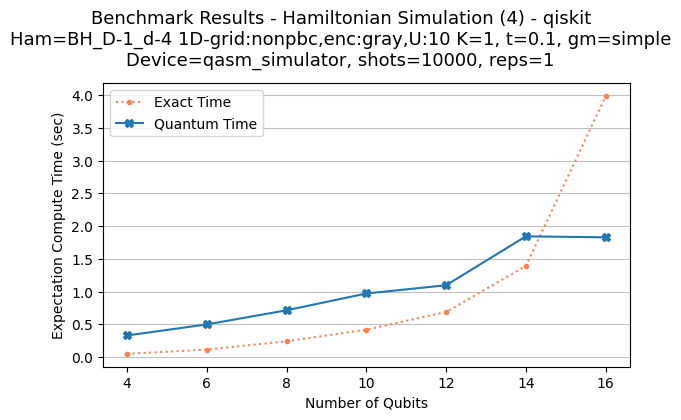

In [7]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/bosehubbard/BH_D-1_d-4'
hamiltonian_params = { "1D-grid": "nonpbc", "enc": "gray", "U":10 }

hamlib_simulation_benchmark.run(
            min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = 0.1,
            hamiltonian_params = hamiltonian_params, group_method = group_method,
            do_observables = True, distribute_shots = distribute_shots,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Random Max3Sat


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 19, 2025 20:42:18 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = max3sat_n-4_ratio-2_rinst-02
... number of terms in Hamiltonian = 12
... number of circuits executed = 1
... quantum execution time = 0.036
... exact computation time = 0.005 sec

    Exact expectation value, computed classically: 7.0
    Estimated expectation value, from quantum algorithm: 7.0
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qubits = 5
... dataset_name = max3sat_n-5_ratio-2_rinst-02
... number of terms in Hamiltonian = 17
... number of circuits executed = 1
... quantum execution time = 0.031
... exact computation time = 0.031 sec

    Exact expectation value, computed classically: 8.0
    Estimated expectation value, from quantum algorithm: 8.0
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qubits = 6
... dataset_name = max3sat_n-6_rat

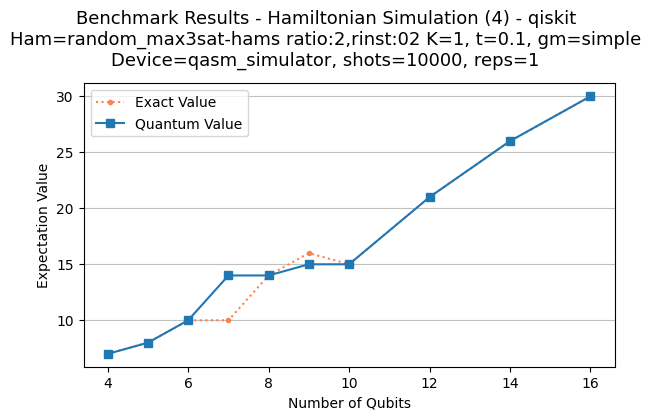

----- Expectation Time Plot -----


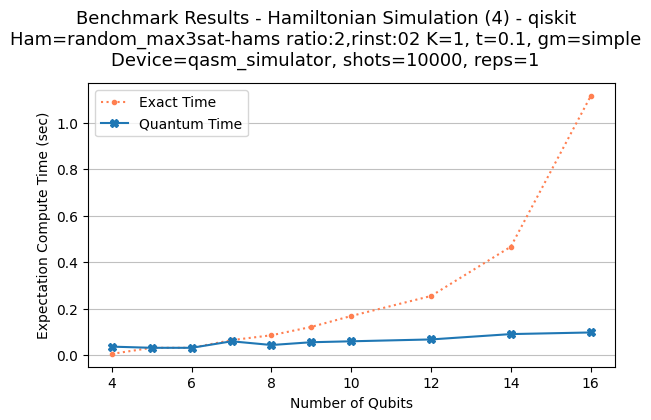

In [8]:
# Max3Sat - ratio 2 rinst 02
hamiltonian_name = 'binaryoptimization/max3sat/random/random_max3sat-hams'
hamiltonian_params = { "ratio": "2", "rinst": "02" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params, group_method = group_method,
            do_observables = True, distribute_shots = distribute_shots,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - H2


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 19, 2025 20:42:23 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = ham_BK-4
... number of terms in Hamiltonian = 15
... number of circuits executed = 3
... quantum execution time = 0.08
... exact computation time = 0.017 sec

    Exact expectation value, computed classically: -0.5367
    Estimated expectation value, from quantum algorithm: -0.5367
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qubits = 6
... dataset_name = ham_BK-6
... number of terms in Hamiltonian = 62
... number of circuits executed = 19
... quantum execution time = 0.966
... exact computation time = 0.097 sec

    Exact expectation value, computed classically: -0.5102
    Estimated expectation value, from quantum algorithm: -0.5117
    ==> Simulation Quality: 1.003

************
Executing [1] circuits with num_qubits = 8
... dataset_name = ham_BK-8
... number of terms in Hamil

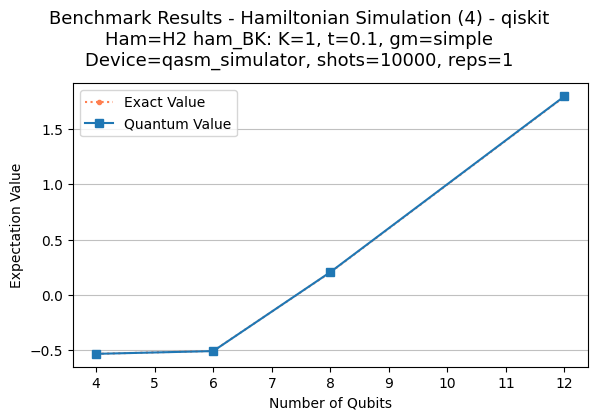

----- Expectation Time Plot -----


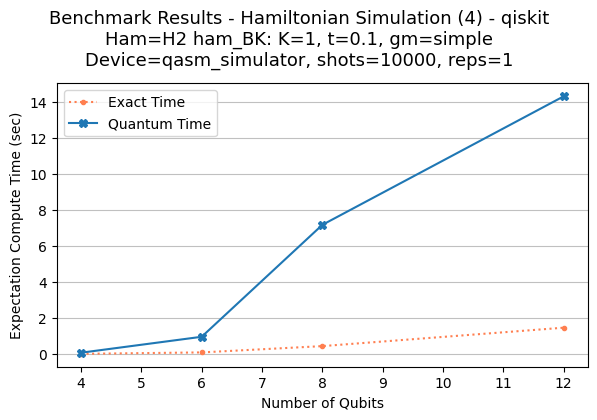

In [9]:
# H2 - BK encoding
hamiltonian_name = 'chemistry/electronic/standard/H2'
hamiltonian_params = { "ham_BK": "" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=min(max_qubits, 12), skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params, group_method = group_method,
            do_observables = True, distribute_shots = distribute_shots,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Combined Benchmark Results

In [10]:
import qiskit
print(qiskit.__version__)

1.2.1
